In [23]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import t

folder_path = './6servers_json/'


In [24]:
def get_jsons(folder_path):
    # create a list to store the (file_name, data) tuples
    json_data = []
    
    # loop through all the files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.json'):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r') as f:
                data = pd.read_json(f)
                json_data.append((file_name, data))
                
    return json_data



In [25]:
def JobAvgTimeSys(json_data):
    # create an empty list to store the results
    dfs_elastic = []
    dfs_inelastic = []
    # loop through the keys of the JSON data dictionary
    for filename,data in json_data:
        # create an empty DataFrame for the current file
        df = pd.DataFrame(columns=['filename','module', 'name', 'value'])
      
        for key in data:
            # extract the scalars for the current General
            scalars = data[key]['scalars']
                
                # loop through the scalars and append them to the DataFrame
            for scalar in scalars:
                module = scalar['module']
                name = scalar['name']
                value = scalar['value']
                #df1 = pd.concat([df,pd.DataFrame.from_records([{'General': key, 'module': module, 'name': name, 'value': value}])], ignore_index=True)
                
                #results.append((filename, df1))
    
                # check if the scalar is for the module Rete.ElasticSink
                if module == 'Rete.ElasticSink' and name == 'lifeTime:mean':
                    df1 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_elastic.append(df1)
                   
                # check if the scalar is for the module Rete.InleasticSink
                elif module == 'Rete.InelasticSink' and name == 'lifeTime:mean':
                    df2 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_inelastic.append(df2)
   
    return dfs_elastic,dfs_inelastic


In [26]:
def JobMinTimeSys(json_data):
     # create an empty list to store the results
    dfs_elastic = []
    dfs_inelastic = []
    # loop through the keys of the JSON data dictionary
    for filename,data in json_data:
        # create an empty DataFrame for the current file
        df = pd.DataFrame(columns=['filename','module', 'name', 'value'])
      
        for key in data:
            # extract the scalars for the current General
            scalars = data[key]['scalars']
                
                # loop through the scalars and append them to the DataFrame
            for scalar in scalars:
                module = scalar['module']
                name = scalar['name']
                value = scalar['value']
                #df1 = pd.concat([df,pd.DataFrame.from_records([{'General': key, 'module': module, 'name': name, 'value': value}])], ignore_index=True)
                
                #results.append((filename, df1))
    
                # check if the scalar is for the module Rete.ElasticSink
                if module == 'Rete.ElasticSink' and name == 'lifeTime:min':
                    df1 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_elastic.append(df1)
                   
                # check if the scalar is for the module Rete.InleasticSink
                elif module == 'Rete.InelasticSink' and name == 'lifeTime:min':
                    df2 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_inelastic.append(df2)
   
    return dfs_elastic,dfs_inelastic

In [27]:
def JobMaxTimeSys(json_data):
    # create an empty list to store the results
    dfs_elastic = []
    dfs_inelastic = []
    # loop through the keys of the JSON data dictionary
    for filename,data in json_data:
        # create an empty DataFrame for the current file
        df = pd.DataFrame(columns=['filename','module', 'name', 'value'])
      
        for key in data:
            # extract the scalars for the current General
            scalars = data[key]['scalars']
                
                # loop through the scalars and append them to the DataFrame
            for scalar in scalars:
                module = scalar['module']
                name = scalar['name']
                value = scalar['value']
                #df1 = pd.concat([df,pd.DataFrame.from_records([{'General': key, 'module': module, 'name': name, 'value': value}])], ignore_index=True)
                
                #results.append((filename, df1))
    
                # check if the scalar is for the module Rete.ElasticSink
                if module == 'Rete.ElasticSink' and name == 'lifeTime:max':
                    df1 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_elastic.append(df1)
                   
                # check if the scalar is for the module Rete.InleasticSink
                elif module == 'Rete.InelasticSink' and name == 'lifeTime:max':
                    df2 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_inelastic.append(df2)
   
    return dfs_elastic,dfs_inelastic

In [28]:
def PointEstConfInt(df_list1,df_list2):
    # compute the point estimate and confidence interval for the mean of each module
    df = pd.concat(df_list1, ignore_index=True)
    df2 = pd.concat(df_list2, ignore_index=True)

    elastic_points = {}
    inelastic_points = {}
    

    for filename in df['filename'].unique():
        module = df.iloc[0]['module']
        values = df.loc[df['filename'] == filename, 'value']
        name = df.iloc[0]['name']
        n = len(values)
        mean = values.mean()
        variance = values.var()
        se = np.sqrt(variance) / np.sqrt(n)
        alpha = 0.05  # 95% confidence interval
        dof = n - 1  # degrees of freedom
        interval = t.interval(alpha, dof, loc=mean, scale=se)
        point_estimate = mean
        lower_ci = interval[0]
        upper_ci = interval[1]
        elastic_points[filename] = point_estimate
        print(
            f'{filename}|{module}|{name}: point estimate = {point_estimate:.5f}, 95% CI = ({lower_ci:.5f}, {upper_ci:.5f}), variance = {variance:.5f}'
        )

    for filename in df['filename'].unique():
        module = df2.iloc[0]['module']
        values = df2.loc[df2['filename'] == filename, 'value']
        name = df2.iloc[0]['name']
        n = len(values)
        mean = values.mean()
        variance = values.var()
        se = np.sqrt(variance) / np.sqrt(n)
        alpha = 0.05  # 95% confidence interval
        dof = n - 1  # degrees of freedom
        interval = t.interval(alpha, dof, loc=mean, scale=se)
        point_estimate = mean
        lower_ci = interval[0]
        upper_ci = interval[1]
        inelastic_points[filename] = point_estimate
        print(
            f'{filename}|{module}|{name}: point estimate = {point_estimate:.5f}, 95% CI = ({lower_ci:.5f}, {upper_ci:.5f}), variance = {variance:.5f}'
        )
    return elastic_points, inelastic_points

In [29]:
def plotAvgTime(elastic_points, inelastic_points):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    elastic = dict(sorted(elastic_points.items(), key=lambda x: x[1])[:3])
    inelastic = dict(sorted(inelastic_points.items(), key=lambda x: x[1])[:3])
    
    
    ax1.barh(list(elastic.keys()), list(elastic.values()), color='blue')
    ax1.set_xlabel('Average Time in System ')
    ax1.set_title('Elastic Job')
        
    ax2.barh(list(inelastic.keys()), list(inelastic.values()), color='red')
    ax2.set_xlabel('Average Time in System ')
    ax2.set_title('Inelastic Job')

    plt.tight_layout()
    plt.show()




In [30]:
def plotMaxTime(elastic_points, inelastic_points):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    elastic = dict(sorted(elastic_points.items(), key=lambda x: x[1])[:3])
    inelastic = dict(sorted(inelastic_points.items(), key=lambda x: x[1])[:3])
    
    
    ax1.barh(list(elastic.keys()), list(elastic.values()), color='blue')
    ax1.set_xlabel('Max Time in System ')
    ax1.set_title('Elastic Job')
        
    ax2.barh(list(inelastic.keys()), list(inelastic.values()), color='red')
    ax2.set_xlabel('Max Time in System ')
    ax2.set_title('Inelastic Job')

    plt.tight_layout()
    plt.show()

In [31]:
def plotMinTime(elastic_points, inelastic_points):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    elastic = dict(sorted(elastic_points.items(), key=lambda x: x[1])[:3])
    inelastic = dict(sorted(inelastic_points.items(), key=lambda x: x[1])[:3])
    
    
    ax1.barh(list(elastic.keys()), list(elastic.values()), color='blue')
    ax1.set_xlabel('Min Time in System ',)
    ax1.set_title('Elastic Job')
        
    ax2.barh(list(inelastic.keys()), list(inelastic.values()), color='red')
    ax2.set_xlabel('Min Time in System ')
    ax2.set_title('Inelastic Job')

    plt.tight_layout()
    
    plt.show()

In [32]:
def QueueJobsDropped(json_data):
   # create an empty list to store the results
    dfs_elastic = []
    dfs_inelastic = []
    # loop through the keys of the JSON data dictionary
    for filename,data in json_data:
        # create an empty DataFrame for the current file
        df = pd.DataFrame(columns=['filename','module', 'name', 'value'])
      
        for key in data:
            # extract the scalars for the current General
            scalars = data[key]['scalars']
                
                # loop through the scalars and append them to the DataFrame
            for scalar in scalars:
                module = scalar['module']
                name = scalar['name']
                value = scalar['value']
                #df1 = pd.concat([df,pd.DataFrame.from_records([{'General': key, 'module': module, 'name': name, 'value': value}])], ignore_index=True)
                
                #results.append((filename, df1))
    
                # check if the scalar is for the module Rete.ElasticSink
                if module == 'Rete.ElasticQueue' and name == 'dropped:count':
                    df1 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_elastic.append(df1)
                    
                   
                # check if the scalar is for the module Rete.InleasticSink
                elif module == 'Rete.InelasticQueue' and name == 'dropped:count':
                    df2 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_inelastic.append(df2)
   
    return dfs_elastic,dfs_inelastic

In [33]:
def AvgDroppedJobs(df_list1,df_list2):

    df = pd.concat(df_list1, ignore_index=True)
    df2 = pd.concat(df_list2, ignore_index=True)
    averages1 = {}
    averages2 = {}

    print('---------- Dropped jobs in Elastic Queue ---------- \n')
    for filename in df['filename'].unique():
        module = df.iloc[0]['module']
        values = df.loc[df['filename'] == filename, 'value']
        name = df.iloc[0]['name']
        n = len(values)
        mean = values.mean()
        se = values.std() / (n ** 0.5)
        alpha = 0.05 # 95% confidence interval
        dof = n - 1 # degrees of freedom
        interval = t.interval(alpha, dof, loc=mean, scale=se)
        point_estimate = mean
        lower_ci = interval[0]
        upper_ci = interval[1]
        averages1[filename] = point_estimate
        print(f'{filename}|{module}|{name}: point estimate = {point_estimate:.5f}, 95% CI = ({lower_ci:.5f}, {upper_ci:.5f})')

    print('---------- Dropped jobs in Inelastic Queue ---------- \n')
    for filename in df2['filename'].unique():
        module = df2.iloc[0]['module']
        values = df2.loc[df2['filename'] == filename, 'value']
        name = df2.iloc[0]['name']
        n = len(values)
        mean = values.mean()
        se = values.std() / (n ** 0.5)
        alpha = 0.05 # 95% confidence interval
        dof = n - 1 # degrees of freedom
        interval = t.interval(alpha, dof, loc=mean, scale=se)
        point_estimate = mean
        lower_ci = interval[0]
        upper_ci = interval[1]
        averages2[filename] = point_estimate
        print(f'{filename}|{module}|{name}: point estimate = {point_estimate:.5f}, 95% CI = ({lower_ci:.5f}, {upper_ci:.5f})')

    return averages1,averages2



In [34]:
def plotDropped(elastic, inelastic):
    # Figure 1
    fig1, ax1 = plt.subplots(figsize=(10, 15))

    words = ['General-','.json']

    elastic = {remove_words_from_key(k,words): v for k, v in elastic.items() if v > 0}
    elastic_sorted = sorted(elastic.items(), key=lambda x: x[1], reverse=True)
    keys_elastic, values_elastic = zip(*elastic_sorted)

    ax1.barh(keys_elastic, values_elastic, color='blue')
    ax1.set_xlabel('Average Dropped Jobs')
    ax1.set_title('Elastic Queue')

    # Figure 2
    fig2, ax2 = plt.subplots(figsize=(10, 18))

    inelastic = {remove_words_from_key(k,words): v for k, v in inelastic.items() if v > 0}
    inelastic_sorted = sorted(inelastic.items(), key=lambda x: x[1], reverse=True)
    keys_inelastic, values_inelastic = zip(*inelastic_sorted)

    ax2.barh(keys_inelastic, values_inelastic, color='green')
    ax2.set_xlabel('Average Dropped Jobs')
    ax2.set_title('Inelastic Queue')

    plt.show()

def remove_words_from_key(key,words):
    for word in words:
        key = key.replace(word, '')
    return key

In [35]:
def UseFact(json_data):
     # create an empty list to store the results
    dfs_server0 = []
    #dfs_server1 = []
    #dfs_server2 = []
    #dfs_server3 = []
    #dfs_server4 = []
    #dfs_server5 = []
    # loop through the keys of the JSON data dictionary
    for filename,data in json_data:
        # create an empty DataFrame for the current file
        df = pd.DataFrame(columns=['filename','module', 'name', 'value'])
      
        for key in data:
            # extract the scalars for the current General
            scalars = data[key]['scalars']
                
                # loop through the scalars and append them to the DataFrame
            for scalar in scalars:
                module = scalar['module']
                name = scalar['name']
                value = scalar['value']
                #df1 = pd.concat([df,pd.DataFrame.from_records([{'General': key, 'module': module, 'name': name, 'value': value}])], ignore_index=True)
                
                #results.append((filename, df1))
    
                
                if module == 'Rete.server' and name == 'busy:timeavg':
                    df1 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_server0.append(df1)
                    
                
                
   
    return dfs_server0#,dfs_server1,dfs_server2,dfs_server3,dfs_server4,dfs_server5
    

In [36]:
def PointEstConfIntUseFact6(df_list1):
    # compute the point estimate and confidence interval for the mean of each module
    df = pd.concat(df_list1, ignore_index=True)
    #df2 = pd.concat(df_list2, ignore_index=True)
    #df3 = pd.concat(df_list3, ignore_index=True)
    #df4 = pd.concat(df_list4, ignore_index=True)
    #df5 = pd.concat(df_list5, ignore_index=True)
    #df6 = pd.concat(df_list6, ignore_index=True)

    server0 = {}
    #server1 = {}
    #server2 = {}
    #server3 = {}
    #server4 = {}
    #server5 = {}
    

    for filename in df['filename'].unique():
        module = df.iloc[0]['module']
        values = df.loc[df['filename'] == filename, 'value']
        name = df.iloc[0]['name']
        n = len(values)
        mean = values.mean()
        variance = values.var()
        se = np.sqrt(variance) / np.sqrt(n)
        alpha = 0.05  # 95% confidence interval
        dof = n - 1  # degrees of freedom
        interval = t.interval(alpha, dof, loc=mean, scale=se)
        point_estimate = mean
        lower_ci = interval[0]
        upper_ci = interval[1]
        server0[filename] = point_estimate
        print(
            f'{filename}|{module}|{name}: point estimate = {point_estimate:.5f}, 95% CI = ({lower_ci:.5f}, {upper_ci:.5f}), variance = {variance:.5f}'
        )
    
    return server0

In [37]:
def plotFactUse(server0):
    fig, (ax1) = plt.subplots(1, 1, figsize=(10, 5))  
      
    server_0 = dict(sorted(server0.items(), key=lambda x: x[1])[:3])
    #server_1= dict(sorted(server1.items(), key=lambda x: x[1])[:3])
    #server_2 = dict(sorted(server2.items(), key=lambda x: x[1])[:3])
    #server_3 = dict(sorted(server3.items(), key=lambda x: x[1])[:3])
    #server_4 = dict(sorted(server4.items(), key=lambda x: x[1])[:3])
    #server_5 = dict(sorted(server5.items(), key=lambda x: x[1])[:3])
    
    ax1.barh(list(server_0.keys()), list(server_0.values()), color='blue')
    ax1.set_xlabel('busy average time')
    ax1.set_title('server 0')
        
    
    plt.tight_layout()
    
    plt.show()

In [38]:
json_data = get_jsons(folder_path)

General-0.5s,0.5s,-1,-1.json|Rete.ElasticSink|lifeTime:mean: point estimate = 0.63753, 95% CI = (0.63743, 0.63762), variance = 0.00004
General-0.5s,0.5s,-1,4.json|Rete.ElasticSink|lifeTime:mean: point estimate = 0.63133, 95% CI = (0.63124, 0.63142), variance = 0.00004
General-0.5s,0.5s,-1,6.json|Rete.ElasticSink|lifeTime:mean: point estimate = 0.63711, 95% CI = (0.63702, 0.63720), variance = 0.00004
General-0.5s,0.5s,4,-1.json|Rete.ElasticSink|lifeTime:mean: point estimate = 0.63541, 95% CI = (0.63533, 0.63548), variance = 0.00003
General-0.5s,0.5s,4,4.json|Rete.ElasticSink|lifeTime:mean: point estimate = 0.62701, 95% CI = (0.62693, 0.62710), variance = 0.00004
General-0.5s,0.5s,4,6.json|Rete.ElasticSink|lifeTime:mean: point estimate = 0.63502, 95% CI = (0.63493, 0.63511), variance = 0.00004
General-0.5s,0.5s,6,-1.json|Rete.ElasticSink|lifeTime:mean: point estimate = 0.63909, 95% CI = (0.63902, 0.63916), variance = 0.00002
General-0.5s,0.5s,6,4.json|Rete.ElasticSink|lifeTime:mean: poin

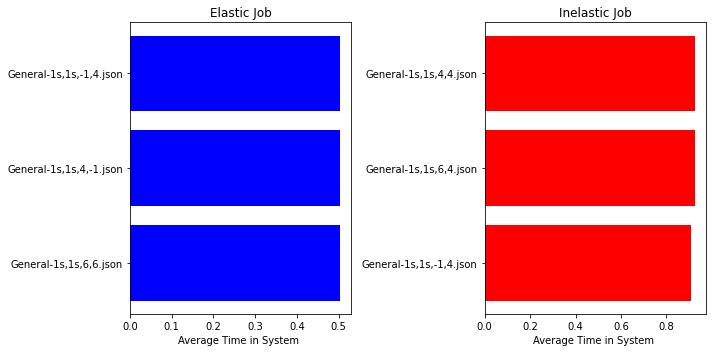

In [39]:
df1,df2 = JobAvgTimeSys(json_data)
p1, p2 = PointEstConfInt(df1,df2)
plotAvgTime(p1,p2)

General-0.5s,0.5s,-1,-1.json|Rete.ElasticSink|lifeTime:min: point estimate = 0.27270, 95% CI = (0.27265, 0.27275), variance = 0.00001
General-0.5s,0.5s,-1,4.json|Rete.ElasticSink|lifeTime:min: point estimate = 0.26954, 95% CI = (0.26951, 0.26957), variance = 0.00000
General-0.5s,0.5s,-1,6.json|Rete.ElasticSink|lifeTime:min: point estimate = 0.27129, 95% CI = (0.27124, 0.27134), variance = 0.00001
General-0.5s,0.5s,4,-1.json|Rete.ElasticSink|lifeTime:min: point estimate = 0.27429, 95% CI = (0.27425, 0.27433), variance = 0.00001
General-0.5s,0.5s,4,4.json|Rete.ElasticSink|lifeTime:min: point estimate = 0.26878, 95% CI = (0.26875, 0.26880), variance = 0.00000
General-0.5s,0.5s,4,6.json|Rete.ElasticSink|lifeTime:min: point estimate = 0.27177, 95% CI = (0.27171, 0.27183), variance = 0.00002
General-0.5s,0.5s,6,-1.json|Rete.ElasticSink|lifeTime:min: point estimate = 0.27576, 95% CI = (0.27567, 0.27585), variance = 0.00004
General-0.5s,0.5s,6,4.json|Rete.ElasticSink|lifeTime:min: point estima

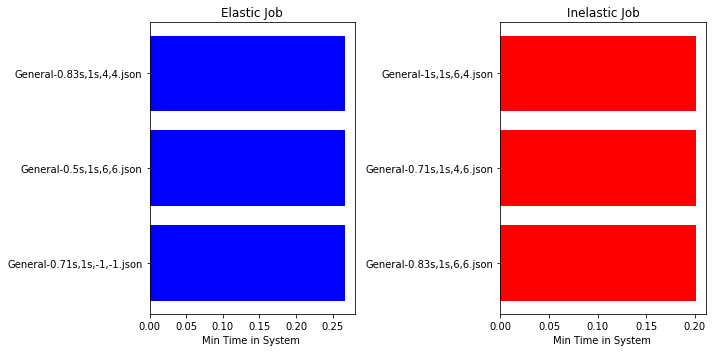

In [40]:
df1,df2 = JobMinTimeSys(json_data)
p1,p2 = PointEstConfInt(df1,df2)
plotMinTime(p1,p2)

General-0.5s,0.5s,-1,-1.json|Rete.ElasticSink|lifeTime:max: point estimate = 1.32273, 95% CI = (1.32154, 1.32393), variance = 0.00710
General-0.5s,0.5s,-1,4.json|Rete.ElasticSink|lifeTime:max: point estimate = 1.34663, 95% CI = (1.34567, 1.34758), variance = 0.00453
General-0.5s,0.5s,-1,6.json|Rete.ElasticSink|lifeTime:max: point estimate = 1.34213, 95% CI = (1.34080, 1.34347), variance = 0.00883
General-0.5s,0.5s,4,-1.json|Rete.ElasticSink|lifeTime:max: point estimate = 1.26313, 95% CI = (1.26242, 1.26384), variance = 0.00250
General-0.5s,0.5s,4,4.json|Rete.ElasticSink|lifeTime:max: point estimate = 1.31853, 95% CI = (1.31750, 1.31955), variance = 0.00524
General-0.5s,0.5s,4,6.json|Rete.ElasticSink|lifeTime:max: point estimate = 1.31077, 95% CI = (1.31005, 1.31149), variance = 0.00255
General-0.5s,0.5s,6,-1.json|Rete.ElasticSink|lifeTime:max: point estimate = 1.31398, 95% CI = (1.31306, 1.31489), variance = 0.00415
General-0.5s,0.5s,6,4.json|Rete.ElasticSink|lifeTime:max: point estima

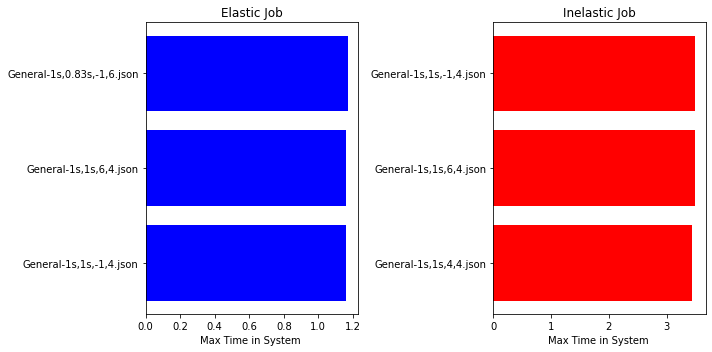

In [41]:
df1,df2 = JobMaxTimeSys(json_data)
p1, p2 = PointEstConfInt(df1,df2)
plotMaxTime(p1,p2)

---------- Dropped jobs in Elastic Queue ---------- 

General-0.5s,0.5s,-1,-1.json|Rete.ElasticQueue|dropped:count: point estimate = 0.00000, 95% CI = (nan, nan)
General-0.5s,0.5s,-1,4.json|Rete.ElasticQueue|dropped:count: point estimate = 0.00000, 95% CI = (nan, nan)
General-0.5s,0.5s,-1,6.json|Rete.ElasticQueue|dropped:count: point estimate = 0.00000, 95% CI = (nan, nan)
General-0.5s,0.5s,4,-1.json|Rete.ElasticQueue|dropped:count: point estimate = 15.55000, 95% CI = (15.47646, 15.62354)
General-0.5s,0.5s,4,4.json|Rete.ElasticQueue|dropped:count: point estimate = 14.20000, 95% CI = (14.14086, 14.25914)
General-0.5s,0.5s,4,6.json|Rete.ElasticQueue|dropped:count: point estimate = 14.90000, 95% CI = (14.83939, 14.96061)
General-0.5s,0.5s,6,-1.json|Rete.ElasticQueue|dropped:count: point estimate = 0.60000, 95% CI = (0.58746, 0.61254)
General-0.5s,0.5s,6,4.json|Rete.ElasticQueue|dropped:count: point estimate = 0.65000, 95% CI = (0.63757, 0.66243)
General-0.5s,0.5s,6,6.json|Rete.ElasticQueu

c:\Users\Giuseppe Caputo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2162: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\Giuseppe Caputo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2163: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


General-0.71s,0.83s,4,4.json|Rete.ElasticQueue|dropped:count: point estimate = 2.60000, 95% CI = (2.57770, 2.62230)
General-0.71s,0.83s,4,6.json|Rete.ElasticQueue|dropped:count: point estimate = 3.00000, 95% CI = (2.96977, 3.03023)
General-0.71s,0.83s,6,-1.json|Rete.ElasticQueue|dropped:count: point estimate = 0.10000, 95% CI = (0.09563, 0.10437)
General-0.71s,0.83s,6,4.json|Rete.ElasticQueue|dropped:count: point estimate = 0.00000, 95% CI = (nan, nan)
General-0.71s,0.83s,6,6.json|Rete.ElasticQueue|dropped:count: point estimate = 0.20000, 95% CI = (0.19257, 0.20743)
General-0.71s,1s,-1,-1.json|Rete.ElasticQueue|dropped:count: point estimate = 0.00000, 95% CI = (nan, nan)
General-0.71s,1s,-1,4.json|Rete.ElasticQueue|dropped:count: point estimate = 0.00000, 95% CI = (nan, nan)
General-0.71s,1s,-1,6.json|Rete.ElasticQueue|dropped:count: point estimate = 0.00000, 95% CI = (nan, nan)
General-0.71s,1s,4,-1.json|Rete.ElasticQueue|dropped:count: point estimate = 2.75000, 95% CI = (2.72523, 2.7

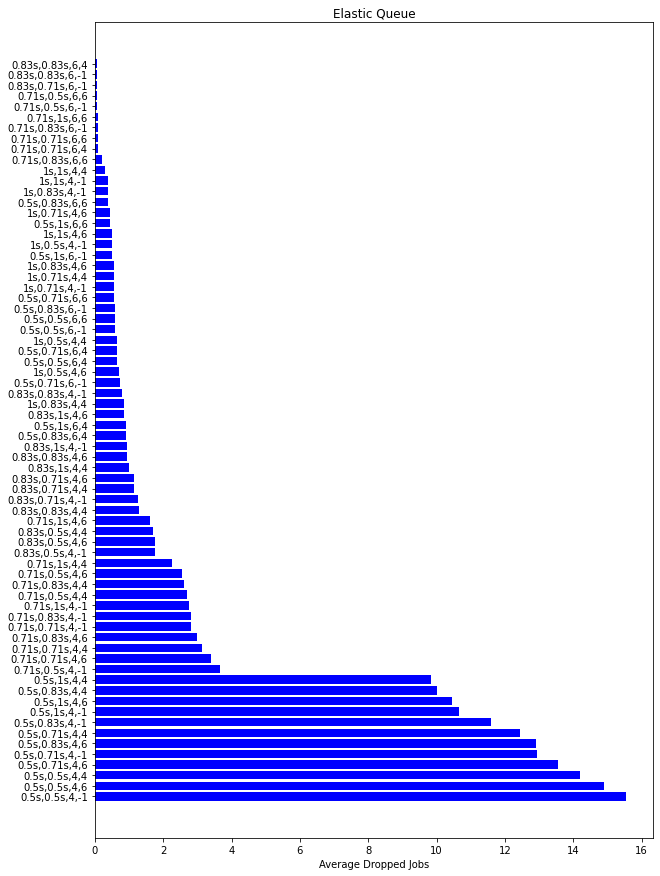

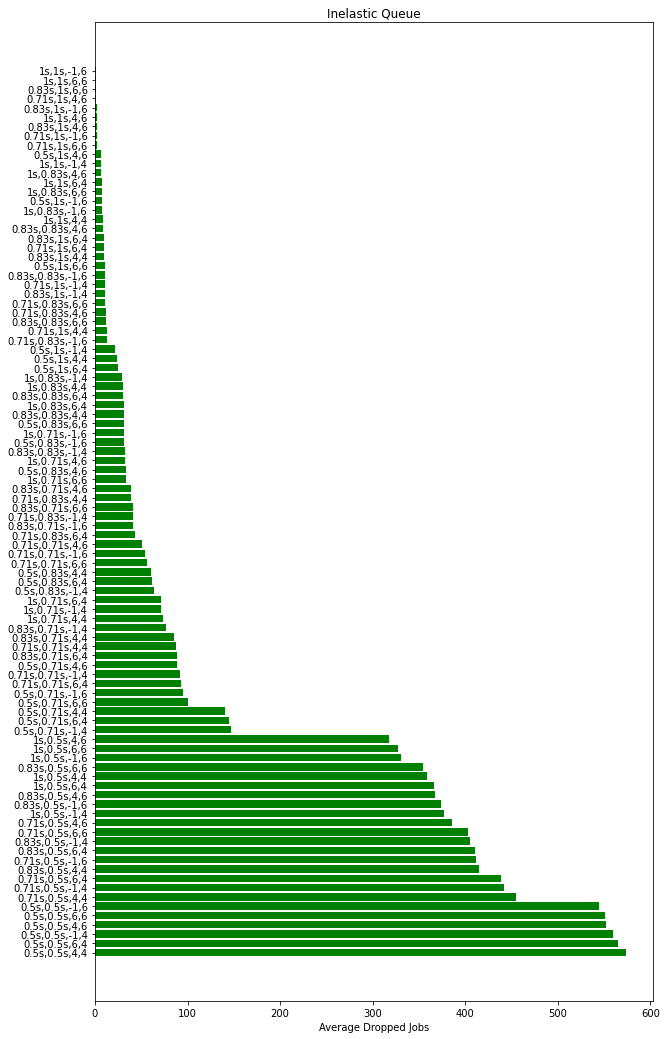

In [42]:
df1,df2 = QueueJobsDropped(json_data)
p1,p2 = AvgDroppedJobs(df1,df2)
plotDropped(p1,p2)

General-0.5s,0.5s,-1,-1.json|Rete.server|busy:timeavg: point estimate = 0.99909, 95% CI = (0.99907, 0.99910), variance = 0.00000
General-0.5s,0.5s,-1,4.json|Rete.server|busy:timeavg: point estimate = 0.97873, 95% CI = (0.97865, 0.97881), variance = 0.00003
General-0.5s,0.5s,-1,6.json|Rete.server|busy:timeavg: point estimate = 0.99291, 95% CI = (0.99286, 0.99295), variance = 0.00001
General-0.5s,0.5s,4,-1.json|Rete.server|busy:timeavg: point estimate = 0.99907, 95% CI = (0.99905, 0.99908), variance = 0.00000
General-0.5s,0.5s,4,4.json|Rete.server|busy:timeavg: point estimate = 0.97843, 95% CI = (0.97836, 0.97850), variance = 0.00003
General-0.5s,0.5s,4,6.json|Rete.server|busy:timeavg: point estimate = 0.99202, 95% CI = (0.99196, 0.99207), variance = 0.00001
General-0.5s,0.5s,6,-1.json|Rete.server|busy:timeavg: point estimate = 0.99945, 95% CI = (0.99945, 0.99946), variance = 0.00000
General-0.5s,0.5s,6,4.json|Rete.server|busy:timeavg: point estimate = 0.97900, 95% CI = (0.97894, 0.97906

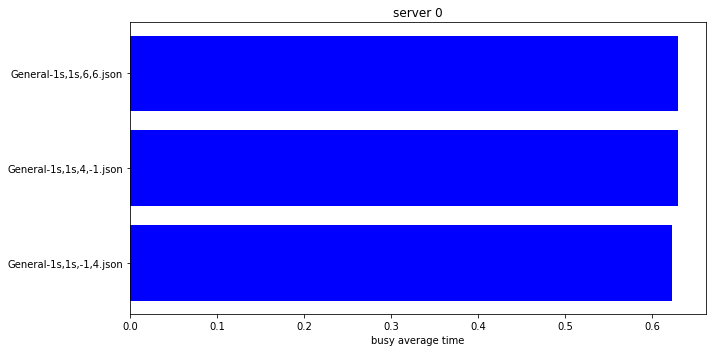

In [44]:
df1 = UseFact(json_data)
p1 =PointEstConfIntUseFact6(df1)
plotFactUse(p1)